In [1]:
import pandas as pd
houses = pd.read_csv('../Lianjia_project.csv', names= ['housecode', 'name', 'line', 'station', 'residential', 'area', 'type', 'houseArea',
            'orientation', 'decoration', 'floor', 'buildingTime', 'buildingType', 'follow',
            'unitPrice', 'totalPrice', 'tags', 'href', 'elevator', 'tradeProperty', 'farFromStation'])

In [2]:
# 经分析具体数据发现，户型数量5室及以上都是可以排除的，不在分析范围之内，要么是别墅，要么是双层，要么是写字楼，“0室0厅”也要排除掉
# houses[int(houses['type'][0])>4]
clear_houses = houses[houses.apply(lambda x: int(x['type'][0]) < 5 and int(x['type'][0]) > 0 and x['houseArea'] < 200,axis=1)]

In [3]:
# 因为一套房有可能在三个地铁之间，而数据在距离0-500， 500-800重复采集，所以以housecode, station去重
clear_data = clear_houses.drop_duplicates(['housecode', 'station']).reset_index()

In [4]:
clear_data.head()

,index,housecode,name,line,station,residential,area,type,houseArea,orientation,...,buildingTime,buildingType,follow,unitPrice,totalPrice,tags,href,elevator,tradeProperty,farFromStation
0,0,106104305279,绿地世纪城标准套一，有装修有家具家电。,1号线(科学城-韦家碾),韦家碾站,绿地世纪城,驷马桥,1室1厅,50.62,北,...,2016.0,塔楼,5,14422.0,73.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106104305279...,2,1,2
1,1,106101436146,绿地世纪城朝南精装横厅套二中高楼层,1号线(科学城-韦家碾),韦家碾站,绿地世纪城,驷马桥,2室2厅,73.88,南,...,2016.0,塔楼,9,17597.0,130.0,subway:近地铁;vr:VR房源;five:房本满两年,https://cd.lianjia.com/ershoufang/106101436146...,2,1,2
2,2,106101094541,绿地世纪城标准套二，客厅朝南，位置安静，户型方正。,1号线(科学城-韦家碾),韦家碾站,绿地世纪城,驷马桥,2室1厅,74.00,南,...,2016.0,塔楼,9,17568.0,130.0,subway:近地铁;vr:VR房源,https://cd.lianjia.com/ershoufang/106101094541...,2,1,2
3,3,106103823860,绿地世纪城标准大套四，户型方正，带车位。,1号线(科学城-韦家碾),韦家碾站,绿地世纪城,驷马桥,4室1厅,121.14,北,...,2016.0,塔楼,3,16510.0,200.0,subway:近地铁;vr:VR房源;haskey:随时看房,https://cd.lianjia.com/ershoufang/106103823860...,2,1,2
4,4,106101187487,绿地世纪城标准套一，有装修带家具家电,1号线(科学城-韦家碾),韦家碾站,绿地世纪城,驷马桥,1室1厅,49.88,北,...,2016.0,塔楼,8,15598.0,77.8,subway:近地铁;vr:VR房源;five:房本满两年;haskey:随时看房,https://cd.lianjia.com/ershoufang/106101187487...,2,1,2


In [5]:
clear_data.describe()
# houseArea的数据不正常，max=832186, min=7; unitPrice不正常，max=148045，min=2;totalPrice不正常，min=7,max = 2400

,index,housecode,houseArea,buildingTime,follow,unitPrice,totalPrice,elevator,tradeProperty,farFromStation
count,49587.000000,4.958700e+04,49587.000000,45529.000000,49587.000000,49587.000000,49587.000000,49587.000000,49587.000000,49587.000000
mean,37236.292254,1.061031e+11,90.744957,2007.174328,3.088471,17777.913687,164.369601,1.708452,1.062617,1.517656
std,20275.345208,9.469003e+05,33.067257,6.592857,2.466191,6419.215012,96.979532,0.454480,0.352420,0.499693
min,0.000000,1.060894e+11,7.160000,1976.000000,0.000000,2787.000000,7.000000,1.000000,1.000000,1.000000
25%,21361.000000,1.061025e+11,67.000000,2003.000000,1.000000,13070.000000,98.000000,1.000000,1.000000,1.000000
50%,37411.000000,1.061034e+11,87.000000,2008.000000,2.000000,16501.000000,140.000000,2.000000,1.000000,2.000000
75%,53768.000000,1.061039e+11,111.840000,2012.000000,5.000000,20881.000000,200.000000,2.000000,1.000000,2.000000
max,73898.000000,1.061043e+11,199.860000,2019.000000,9.000000,148045.000000,950.000000,2.000000,4.000000,2.000000


In [8]:
# 进行数据清理,排除掉面积大于200平方，小于50平方
clear_houses = clear_data[clear_data.apply(lambda x: x['houseArea'] > 50,axis=1)]
clear_houses.describe()

,index,housecode,houseArea,buildingTime,follow,unitPrice,totalPrice,elevator,tradeProperty,farFromStation
count,44875.000000,4.487500e+04,44875.000000,41271.000000,44875.000000,44875.000000,44875.000000,44875.000000,44875.000000,44875.000000
mean,37047.825359,1.061031e+11,95.789450,2007.365971,3.104156,17899.197816,174.187236,1.704869,1.060992,1.527019
std,20184.386231,9.457276e+05,30.604445,6.611700,2.468950,6423.791103,96.455236,0.456107,0.342762,0.499275
min,0.000000,1.060894e+11,50.010000,1978.000000,0.000000,5164.000000,36.000000,1.000000,1.000000,1.000000
25%,21038.500000,1.061025e+11,74.010000,2002.000000,1.000000,13111.500000,108.000000,1.000000,1.000000,1.000000
50%,37407.000000,1.061034e+11,88.900000,2009.000000,2.000000,16691.000000,150.000000,2.000000,1.000000,2.000000
75%,53516.500000,1.061039e+11,115.940000,2012.000000,5.000000,21088.000000,210.000000,2.000000,1.000000,2.000000
max,73898.000000,1.061043e+11,199.860000,2019.000000,9.000000,61195.000000,950.000000,2.000000,4.000000,2.000000


In [9]:
from pyecharts.charts import Bar
from pyecharts import options as opts 

In [10]:
# 数量分布图,按housecode去重，因为会存在房子在三个地铁区域，造成重复计算
groupby_station = clear_houses.drop_duplicates('housecode').groupby('station')['station'].count().sort_values(ascending=False)
count_bar = Bar().add_xaxis(groupby_station.index.tolist()).add_yaxis('数量',groupby_station.values.tolist()).set_global_opts(datazoom_opts = {'is_show': True})
count_bar.render_notebook()
# 数量最多的前20个地铁站 羊犀立交，一品天下，春熙路，涌泉，中坝，四河，昭觉寺南路，大源，蜀汉东路，龙爪堰，文化宫，红牌楼，武侯大道，凤凰大街，高升桥，
#武侯立交，骑龙，万年场，桐梓林，天府广场
# 发现前十大主要集中在成都的西边，比如羊犀立交，一品天下，中坝，蜀汉东路，龙爪堰，文化宫，红牌楼，武侯大道，武侯立交，
# 其次是春熙路，天府广场区域和骑龙，四河，大源
# 为什么这些地方二手房那么多，需要思考

In [11]:
# 不同户型的数量分布
by_type_sort = clear_houses.groupby('type')['type'].count().sort_values(ascending=False)
type_bar = (Bar().add_xaxis(by_type_sort.index.tolist()).add_yaxis('数量',by_type_sort.round(2).values.tolist()))
type_bar.render_notebook()
# 户型分三个Level，第一level是“二室一厅”，“三室二厅”，第二level是“二室二厅”“三室一厅”， 第三level是”一室一厅”“四室二厅”，然后就是余下

In [12]:
# 地铁站的单价平均价格分布
unitPrice_by_station_sort = clear_data.groupby('station')['unitPrice'].mean().round(2).sort_values(ascending=False)
type_bar = (Bar().add_xaxis(unitPrice_by_station_sort.index.tolist()).add_yaxis('单价',unitPrice_by_station_sort.values.tolist()).set_global_opts(datazoom_opts = {'is_show': True}))
type_bar.render_notebook()
# 最贵的都在南边，像锦城大道，锦城广场，交子大道，孵化园，金融城，高新站，市一医院，锦城湖，这些地铁站都在一起  
# 其次是中部向东附近，像天府广场，春熙路，锦江宾馆，人民公园，东门大桥，牛市口

In [13]:
# 看看哪里的房子最受欢迎
follow_by_station_sort = clear_data.groupby('station')['follow'].mean().round(2).sort_values(ascending=False)
type_bar = (Bar().add_xaxis(follow_by_station_sort.index.tolist()).add_yaxis('单价',follow_by_station_sort.values.tolist()).set_global_opts(datazoom_opts = {'is_show': True}))
type_bar.render_notebook()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

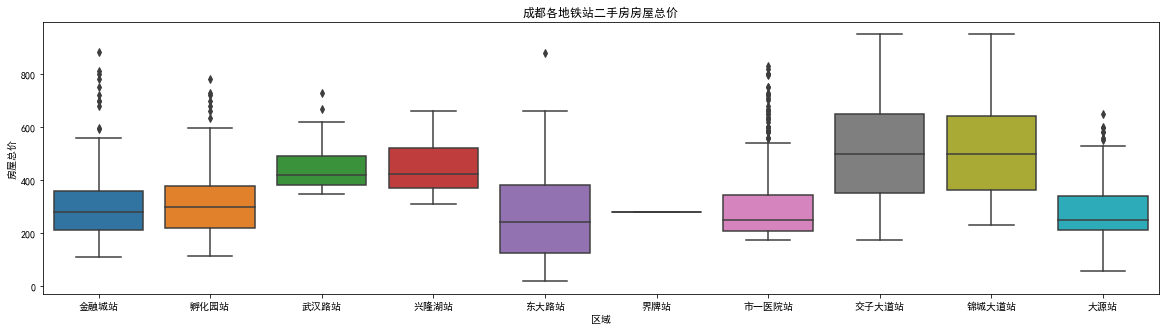

In [15]:
f, ax1 = plt.subplots(figsize=(20,5))
# 只展示总价的平均价格最大的前10个
max_total_station = clear_data.groupby('station')['totalPrice'].mean().sort_values(ascending=False)[:10].index
sns.boxplot(x='station', y='totalPrice', data=clear_data[clear_data.station.isin(max_total_station)], ax=ax1)
ax1.set_title('成都各地铁站二手房房屋总价')
ax1.set_xlabel('区域')
ax1.set_ylabel('房屋总价')
plt.show()
# 总价的地铁站分布和均价的地铁站分布相似，而且价格变化大的也是这些地方

In [ ]:
# 看面积分布
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))

# 房屋面积
sns.distplot(clear_data['houseArea'], ax=ax1, color='r') sns.kdeplot(clear_data['houseArea'], shade=True, ax=ax1) ax1.set_xlabel('面积')

# 房屋面积和价格的关系
sns.regplot(x='houseArea', y='totalPrice', data=clear_data, ax=ax2)
ax2.set_xlabel('面积')¶
ax2.set_ylabel('总价')
plt.show()